# Lesson 1: Text Representation

In [3]:
import string
from collections import Counter
from pprint import pprint
import gzip
import matplotlib.pyplot as plt
import numpy as np

In [4]:
text = """
Let us go then, you and I,
When the evening is spread out against the sky
Like a patient etherized upon a table;
Let us go, through certain half-deserted streets,
The muttering retreats
Of restless nights in one-night cheap hotels
And sawdust restaurants with oyster-shells:
Streets that follow like a tedious argument
Of insidious intent
To lead you to an overwhelming question 

Oh, do not ask, "What is it?"
Let us go and make our visit.

In the room the women come and go
Talking of Michelangelo.

The yellow fog that rubs its back upon the window-panes,
The yellow smoke that rubs its muzzle on the window-panes,
Licked its tongue into the corners of the evening,
Lingered upon the pools that stand in drains,
Let fall upon its back the soot that falls from chimneys,
Slipped by the terrace, made a sudden leap,
And seeing that it was a soft October night,
Curled once about the house, and fell asleep.

And indeed there will be time
For the yellow smoke that slides along the street,
Rubbing its back upon the window-panes;
There will be time, there will be time
To prepare a face to meet the faces that you meet;
There will be time to murder and create,
And time for all the works and days of hands
That lift and drop a question on your plate;
Time for you and time for me,
And time yet for a hundred indecisions,
And for a hundred visions and revisions,
Before the taking of a toast and tea.

In the room the women come and go
Talking of Michelangelo.

And indeed there will be time
To wonder, "Do I dare?" and, "Do I dare?"
Time to turn back and descend the stair,
With a bald spot in the middle of my hair —
(They will say: "How his hair is growing thin!")
My morning coat, my collar mounting firmly to the chin,
My necktie rich and modest, but asserted by a simple pin —
(They will say: "But how his arms and legs are thin!")
Do I dare
Disturb the universe?
In a minute there is time
For decisions and revisions which a minute will reverse.

For I have known them all already, known them all:
Have known the evenings, mornings, afternoons,
I have measured out my life with coffee spoons;
I know the voices dying with a dying fall
Beneath the music from a farther room.
So how should I presume?

And I have known the eyes already, known them all—
The eyes that fix you in a formulated phrase,
And when I am formulated, sprawling on a pin,
When I am pinned and wriggling on the wall,
Then how should I begin
To spit out all the butt-ends of my days and ways?
And how should I presume?

And I have known the arms already, known them all—
Arms that are braceleted and white and bare
(But in the lamplight, downed with light brown hair!)
Is it perfume from a dress
That makes me so digress?
Arms that lie along a table, or wrap about a shawl.
And should I then presume?
And how should I begin?

Shall I say, I have gone at dusk through narrow streets
And watched the smoke that rises from the pipes
Of lonely men in shirt-sleeves, leaning out of windows? 

I should have been a pair of ragged claws
Scuttling across the floors of silent seas.

And the afternoon, the evening, sleeps so peacefully!
Smoothed by long fingers,
Asleep tired or it malingers,
Stretched on the floor, here beside you and me.
Should I, after tea and cakes and ices,
Have the strength to force the moment to its crisis?
But though I have wept and fasted, wept and prayed,
Though I have seen my head (grown slightly bald) brought in upon a platter,
I am no prophet — and here's no great matter;
I have seen the moment of my greatness flicker,
And I have seen the eternal Footman hold my coat, and snicker,
And in short, I was afraid.

And would it have been worth it, after all,
After the cups, the marmalade, the tea,
Among the porcelain, among some talk of you and me,
Would it have been worth while,
To have bitten off the matter with a smile,
To have squeezed the universe into a ball
To roll it towards some overwhelming question,
To say: "I am Lazarus, come from the dead,
Come back to tell you all, I shall tell you all"—
If one, settling a pillow by her head
Should say: "That is not what I meant at all;
That is not it, at all".

And would it have been worth it, after all,
Would it have been worth while,
After the sunsets and the dooryards and the sprinkled streets,
After the novels, after the teacups, after the skirts that trail along the floor—
And this, and so much more?—
It is impossible to say just what I mean!
But as if a magic lantern threw the nerves in patterns on a screen:
Would it have been worth while
If one, settling a pillow or throwing off a shawl,
And turning toward the window, should say:
"That is not it at all,
That is not what I meant, at all".

No! I am not Prince Hamlet, nor was meant to be;
Am an attendant lord, one that will do
To swell a progress, start a scene or two,
Advise the prince; no doubt, an easy tool,
Deferential, glad to be of use,
Politic, cautious, and meticulous;
Full of high sentence, but a bit obtuse;
At times, indeed, almost ridiculous—
Almost, at times, the Fool.

I grow old I grow old 
I shall wear the bottoms of my trousers rolled.

Shall I part my hair behind?   Do I dare to eat a peach?
I shall wear white flannel trousers, and walk upon the beach.
I have heard the mermaids singing, each to each.

I do not think that they will sing to me.

I have seen them riding seaward on the waves
Combing the white hair of the waves blown back
When the wind blows the water white and black.
We have lingered in the chambers of the sea
By sea-girls wreathed with seaweed red and brown
Till human voices wake us, and we drown".
"""


## Tokenization

In [5]:
def extract_words(text):
    temp = filter(lambda s: len(s) > 0, text.split()) # Split the text on whitespace and remove any empty elements
    text_words = []

    for word in temp:
        # Remove any punctuation characters present in the beginning of the word
        while word[0] in string.punctuation:
            word = word[1:] if len(word) > 1 else ""

        # Remove any punctuation characters present at the end of the word
        while word[-1] in string.punctuation:
            word=word[:-1]

        if len(word) > 0:
            # Append this word into the list of words
            text_words.append(word)

    return text_words

In [6]:
text_words = extract_words(text)
print(text_words)

['Let', 'us', 'go', 'then', 'you', 'and', 'I', 'When', 'the', 'evening', 'is', 'spread', 'out', 'against', 'the', 'sky', 'Like', 'a', 'patient', 'etherized', 'upon', 'a', 'table', 'Let', 'us', 'go', 'through', 'certain', 'half-deserted', 'streets', 'The', 'muttering', 'retreats', 'Of', 'restless', 'nights', 'in', 'one-night', 'cheap', 'hotels', 'And', 'sawdust', 'restaurants', 'with', 'oyster-shells', 'Streets', 'that', 'follow', 'like', 'a', 'tedious', 'argument', 'Of', 'insidious', 'intent', 'To', 'lead', 'you', 'to', 'an', 'overwhelming', 'question', 'Oh', 'do', 'not', 'ask', 'What', 'is', 'it', 'Let', 'us', 'go', 'and', 'make', 'our', 'visit', 'In', 'the', 'room', 'the', 'women', 'come', 'and', 'go', 'Talking', 'of', 'Michelangelo', 'The', 'yellow', 'fog', 'that', 'rubs', 'its', 'back', 'upon', 'the', 'window-panes', 'The', 'yellow', 'smoke', 'that', 'rubs', 'its', 'muzzle', 'on', 'the', 'window-panes', 'Licked', 'its', 'tongue', 'into', 'the', 'corners', 'of', 'the', 'evening', 'L

In [7]:
# Let's represent each word by a number

word_dict = {}
word_list = []
vocabulary_size = 0
text_tokens = []

for word in text_words:
    # Create an ID for the first occurence of the word and add to the dictionary
    if word not in word_dict:
        word_dict[word] = vocabulary_size
        word_list.append(word)
        vocabulary_size += 1

    text_tokens.append(word_dict[word])

# Words are now mapped to integers and vice-versa (this word_list provides the sequential index as the referenced ID)
print("Word list:", word_list, "\n\nWord dictionary:")
pprint(word_dict)

Word list: ['Let', 'us', 'go', 'then', 'you', 'and', 'I', 'When', 'the', 'evening', 'is', 'spread', 'out', 'against', 'sky', 'Like', 'a', 'patient', 'etherized', 'upon', 'table', 'through', 'certain', 'half-deserted', 'streets', 'The', 'muttering', 'retreats', 'Of', 'restless', 'nights', 'in', 'one-night', 'cheap', 'hotels', 'And', 'sawdust', 'restaurants', 'with', 'oyster-shells', 'Streets', 'that', 'follow', 'like', 'tedious', 'argument', 'insidious', 'intent', 'To', 'lead', 'to', 'an', 'overwhelming', 'question', 'Oh', 'do', 'not', 'ask', 'What', 'it', 'make', 'our', 'visit', 'In', 'room', 'women', 'come', 'Talking', 'of', 'Michelangelo', 'yellow', 'fog', 'rubs', 'its', 'back', 'window-panes', 'smoke', 'muzzle', 'on', 'Licked', 'tongue', 'into', 'corners', 'Lingered', 'pools', 'stand', 'drains', 'fall', 'soot', 'falls', 'from', 'chimneys', 'Slipped', 'by', 'terrace', 'made', 'sudden', 'leap', 'seeing', 'was', 'soft', 'October', 'night', 'Curled', 'once', 'about', 'house', 'fell', 'a

In [8]:
# The two data structures prove their usefulness when the text list was converted into tokens
print(text_tokens)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 8, 14, 15, 16, 17, 18, 19, 16, 20, 0, 1, 2, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 16, 44, 45, 28, 46, 47, 48, 49, 4, 50, 51, 52, 53, 54, 55, 56, 57, 58, 10, 59, 0, 1, 2, 5, 60, 61, 62, 63, 8, 64, 8, 65, 66, 5, 2, 67, 68, 69, 25, 70, 71, 41, 72, 73, 74, 19, 8, 75, 25, 70, 76, 41, 72, 73, 77, 78, 8, 75, 79, 73, 80, 81, 8, 82, 68, 8, 9, 83, 19, 8, 84, 41, 85, 31, 86, 0, 87, 19, 73, 74, 8, 88, 41, 89, 90, 91, 92, 93, 8, 94, 95, 16, 96, 97, 35, 98, 41, 59, 99, 16, 100, 101, 102, 103, 104, 105, 8, 106, 5, 107, 108, 35, 109, 110, 111, 112, 113, 114, 8, 70, 76, 41, 115, 116, 8, 117, 118, 73, 74, 19, 8, 75, 119, 111, 112, 113, 110, 111, 112, 113, 48, 120, 16, 121, 50, 122, 8, 123, 41, 4, 122, 119, 111, 112, 113, 50, 124, 5, 125, 35, 113, 126, 127, 8, 128, 5, 129, 68, 130, 131, 132, 5, 133, 16, 53, 78, 134, 135, 136, 126, 4, 5, 113, 126, 137, 35, 113, 138, 126, 16, 139, 140, 35, 126, 16, 139, 141

## One-hot encoding

Each word is represented as a one-hot encoded vector where every element is zero except the one corresponding to the specific word. The vector element containing "1" is the "high bit" amongst the low bits ("0"). The high bit represents the index (or first occurence) of the word. 

In [9]:
def one_hot(word, word_dict):
    """
        Generate a one-hot encoded vector corresponding to *word*
    """
    
    vector = np.zeros(len(word_dict))
    vector[word_dict[word]] = 1
    
    return vector

In [10]:
evening_hot = one_hot("evening", word_dict)
print(evening_hot)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## Bag of words

Produce a vector representation of the original text by adding up the one-hot encoded vectors.

In [11]:
text_vector = np.zeros(vocabulary_size)

for word in text_words:
    hot_word = one_hot(word, word_dict)
    text_vector += hot_word

print(text_vector)

[ 4.  4.  5.  2.  9. 36. 41.  3. 70.  3.  9.  1.  4.  1.  1.  1. 34.  1.
  1.  7.  2.  2.  1.  1.  3.  4.  1.  1.  3.  1.  1. 10.  1.  1.  1. 21.
  1.  1.  6.  1.  1. 15.  1.  1.  1.  1.  1.  1.  9.  1. 14.  3.  2.  3.
  1.  3.  7.  1.  1. 14.  1.  1.  1.  3.  3.  2.  3.  2. 17.  2.  3.  1.
  2.  6.  6.  3.  3.  1.  7.  1.  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.
  5.  1.  1.  4.  1.  1.  1.  1.  1.  3.  1.  1.  1.  1.  1.  2.  1.  1.
  1.  3.  4. 10.  7.  9.  3.  1.  3.  1.  1.  2.  1.  1.  2.  1.  1.  1.
  5. 11.  1.  2.  1.  6.  1.  1.  1.  1.  2.  5.  1.  2.  1.  1.  2.  1.
  1.  1.  3.  1.  4.  4.  1.  1.  1.  1.  2.  1.  1.  9.  5.  3.  2.  7.
  1.  2.  1.  2.  2.  1.  2.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  2.
  4.  5.  2.  1.  2.  1.  2.  2.  1.  1.  1. 20.  7.  5.  3.  2.  1.  1.
  1.  1.  1.  1.  1.  1.  2.  2.  1.  1.  1.  1.  7.  3.  2.  2.  1.  2.
  1.  1.  5.  1.  1.  1.  1.  1.  2.  1.  1.  1.  2.  1.  4.  1.  1.  1.
  1.  2.  1.  1.  1.  1.  3.  1.  1.  4.  1.  2.  2

In [14]:
# In practice, the encoding step for each word can be skipped by using the `word_dict`

text_vector = np.zeros(vocabulary_size)

for word in text_words:
    text_vector[word_dict[word]] += 1

# Show the "bag of words" - the frequency each word occurs in the source text

print(text_vector)

[ 4.  4.  5.  2.  9. 36. 41.  3. 70.  3.  9.  1.  4.  1.  1.  1. 34.  1.
  1.  7.  2.  2.  1.  1.  3.  4.  1.  1.  3.  1.  1. 10.  1.  1.  1. 21.
  1.  1.  6.  1.  1. 15.  1.  1.  1.  1.  1.  1.  9.  1. 14.  3.  2.  3.
  1.  3.  7.  1.  1. 14.  1.  1.  1.  3.  3.  2.  3.  2. 17.  2.  3.  1.
  2.  6.  6.  3.  3.  1.  7.  1.  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.
  5.  1.  1.  4.  1.  1.  1.  1.  1.  3.  1.  1.  1.  1.  1.  2.  1.  1.
  1.  3.  4. 10.  7.  9.  3.  1.  3.  1.  1.  2.  1.  1.  2.  1.  1.  1.
  5. 11.  1.  2.  1.  6.  1.  1.  1.  1.  2.  5.  1.  2.  1.  1.  2.  1.
  1.  1.  3.  1.  4.  4.  1.  1.  1.  1.  2.  1.  1.  9.  5.  3.  2.  7.
  1.  2.  1.  2.  2.  1.  2.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  2.
  4.  5.  2.  1.  2.  1.  2.  2.  1.  1.  1. 20.  7.  5.  3.  2.  1.  1.
  1.  1.  1.  1.  1.  1.  2.  2.  1.  1.  1.  1.  7.  3.  2.  2.  1.  2.
  1.  1.  5.  1.  1.  1.  1.  1.  2.  1.  1.  1.  2.  1.  4.  1.  1.  1.
  1.  2.  1.  1.  1.  1.  3.  1.  1.  4.  1.  2.  2

In [15]:
text_vector[word_dict["evening"]]

np.float64(3.0)

In [16]:
# Produce the same result with the `Counter` module:

word_counts = Counter(text_words)
pprint(word_counts)

Counter({'the': 70,
         'I': 41,
         'and': 36,
         'a': 34,
         'And': 21,
         'have': 20,
         'of': 17,
         'that': 15,
         'to': 14,
         'it': 14,
         'all': 11,
         'in': 10,
         'will': 10,
         'you': 9,
         'is': 9,
         'To': 9,
         'time': 9,
         'my': 9,
         'upon': 7,
         'not': 7,
         'on': 7,
         'be': 7,
         'say': 7,
         'known': 7,
         'should': 7,
         'with': 6,
         'its': 6,
         'back': 6,
         'That': 6,
         'at': 6,
         'been': 6,
         'go': 5,
         'from': 5,
         'for': 5,
         'me': 5,
         'hair': 5,
         'how': 5,
         'them': 5,
         'am': 5,
         'after': 5,
         'worth': 5,
         'Let': 4,
         'us': 4,
         'out': 4,
         'The': 4,
         'by': 4,
         'there': 4,
         'Do': 4,
         'dare': 4,
         'But': 4,
         'white': 4,
         'or

In [17]:
# Generate the vecotr and dictionary from using the Counter module

items = list(word_counts.items())

word_dict = dict([[items[i][0], i] for i in range(len(items))])
text_vector = [items[i][1] for i in range(len(items))]

print("Text vector:", text_vector,"\n\nWord dictionary:")
pprint(word_dict)

Text vector: [4, 4, 5, 2, 9, 36, 41, 3, 70, 3, 9, 1, 4, 1, 1, 1, 34, 1, 1, 7, 2, 2, 1, 1, 3, 4, 1, 1, 3, 1, 1, 10, 1, 1, 1, 21, 1, 1, 6, 1, 1, 15, 1, 1, 1, 1, 1, 1, 9, 1, 14, 3, 2, 3, 1, 3, 7, 1, 1, 14, 1, 1, 1, 3, 3, 2, 3, 2, 17, 2, 3, 1, 2, 6, 6, 3, 3, 1, 7, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 4, 10, 7, 9, 3, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 5, 11, 1, 2, 1, 6, 1, 1, 1, 1, 2, 5, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 4, 4, 1, 1, 1, 1, 2, 1, 1, 9, 5, 3, 2, 7, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 5, 2, 1, 2, 1, 2, 2, 1, 1, 1, 20, 7, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 7, 3, 2, 2, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 4, 1, 2, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 3, 1, 1, 1, 1, 1, 2, 1, 3, 3

## Term Frequency

The frequency of a word corresponds to its relevance in the source text.

In [18]:
sorted(items, key=lambda x:x[1], reverse=True)

[('the', 70),
 ('I', 41),
 ('and', 36),
 ('a', 34),
 ('And', 21),
 ('have', 20),
 ('of', 17),
 ('that', 15),
 ('to', 14),
 ('it', 14),
 ('all', 11),
 ('in', 10),
 ('will', 10),
 ('you', 9),
 ('is', 9),
 ('To', 9),
 ('time', 9),
 ('my', 9),
 ('upon', 7),
 ('not', 7),
 ('on', 7),
 ('be', 7),
 ('say', 7),
 ('known', 7),
 ('should', 7),
 ('with', 6),
 ('its', 6),
 ('back', 6),
 ('That', 6),
 ('at', 6),
 ('been', 6),
 ('go', 5),
 ('from', 5),
 ('for', 5),
 ('me', 5),
 ('hair', 5),
 ('how', 5),
 ('them', 5),
 ('am', 5),
 ('after', 5),
 ('worth', 5),
 ('Let', 4),
 ('us', 4),
 ('out', 4),
 ('The', 4),
 ('by', 4),
 ('there', 4),
 ('Do', 4),
 ('dare', 4),
 ('But', 4),
 ('white', 4),
 ('or', 4),
 ('seen', 4),
 ('When', 3),
 ('evening', 3),
 ('streets', 3),
 ('Of', 3),
 ('an', 3),
 ('question', 3),
 ('do', 3),
 ('In', 3),
 ('room', 3),
 ('come', 3),
 ('yellow', 3),
 ('window-panes', 3),
 ('smoke', 3),
 ('was', 3),
 ('indeed', 3),
 ('For', 3),
 ('along', 3),
 ('tea', 3),
 ('—', 3),
 ('already', 3),

The most common words even in our source text are not meaningful - mostly words that have strong grammatical purposes in the text. Let's chart the words in the source text.

Text(0.5, 1.0, 'Word frequency distribution')

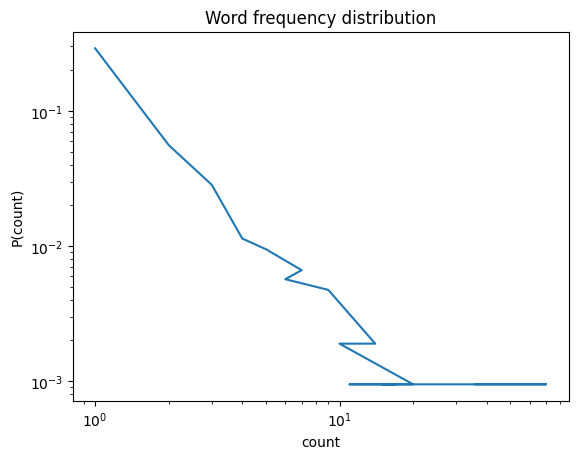

In [19]:
dist = Counter(word_counts.values())
dist = list(dist.items())
dist.sort(key=lambda x:x[1])
dist = np.array(dist)

norm = np.dot(dist.T[0], dist.T[1])

plt.loglog(dist.T[0], dist.T[1]/norm)
plt.xlabel("count")
plt.ylabel("P(count)")
plt.title("Word frequency distribution")

## Stopwords

In natural language processing is to remove from the source text words that are plentiful but not meaningful. These are stopwords. When removed, the dataset shrinks but does not lose much information.

In [20]:
sorted_counts = sorted(list(word_counts.items()), key=lambda x:x[1], reverse=True)

stopwords = set([word for word, count in sorted_counts[:100]])

clean_data = []

for word in word_list:
    if word not in stopwords:
        clean_data.append(word)

print("Original size: ", len(word_list))
print("Clean size:    ", len(clean_data))
print("Reduction:     ", 1 - len(clean_data)/len(word_list))

Original size:  449
Clean size:     349
Reduction:      0.22271714922049002


## Term Frequency / Inverse Document Frequency (TF/IDF)

Let's determine the relative importance of a word by comparing its frequency in many documents.

In [22]:
corpus_text = text.split(".")
corpus_words = []

for document in corpus_text:
    doc_words = extract_words(document)

    if len(doc_words) > 0:
        corpus_words.append(doc_words)

pprint(corpus_words)

[['Let',
  'us',
  'go',
  'then',
  'you',
  'and',
  'I',
  'When',
  'the',
  'evening',
  'is',
  'spread',
  'out',
  'against',
  'the',
  'sky',
  'Like',
  'a',
  'patient',
  'etherized',
  'upon',
  'a',
  'table',
  'Let',
  'us',
  'go',
  'through',
  'certain',
  'half-deserted',
  'streets',
  'The',
  'muttering',
  'retreats',
  'Of',
  'restless',
  'nights',
  'in',
  'one-night',
  'cheap',
  'hotels',
  'And',
  'sawdust',
  'restaurants',
  'with',
  'oyster-shells',
  'Streets',
  'that',
  'follow',
  'like',
  'a',
  'tedious',
  'argument',
  'Of',
  'insidious',
  'intent',
  'To',
  'lead',
  'you',
  'to',
  'an',
  'overwhelming',
  'question',
  'Oh',
  'do',
  'not',
  'ask',
  'What',
  'is',
  'it',
  'Let',
  'us',
  'go',
  'and',
  'make',
  'our',
  'visit'],
 ['In',
  'the',
  'room',
  'the',
  'women',
  'come',
  'and',
  'go',
  'Talking',
  'of',
  'Michelangelo'],
 ['The',
  'yellow',
  'fog',
  'that',
  'rubs',
  'its',
  'back',
  'upon',

In [23]:
# Calculate the number of documents in which each word appears

document_count = {}

for document in corpus_words:
    word_set = set(document)

    for word in word_set:
        document_count[word] = document_count.get(word, 0) + 1

pprint(document_count)

{'Advise': 1,
 'After': 2,
 'Almost': 1,
 'Am': 1,
 'Among': 1,
 'And': 10,
 'Arms': 1,
 'Asleep': 1,
 'At': 1,
 'Before': 1,
 'Beneath': 1,
 'But': 4,
 'By': 1,
 'Combing': 1,
 'Come': 1,
 'Curled': 1,
 'Deferential': 1,
 'Disturb': 1,
 'Do': 2,
 'Fool': 1,
 'Footman': 1,
 'For': 3,
 'Full': 1,
 'Hamlet': 1,
 'Have': 2,
 'How': 1,
 'I': 14,
 'If': 2,
 'In': 3,
 'Is': 1,
 'It': 1,
 'Lazarus': 1,
 'Let': 2,
 'Licked': 1,
 'Like': 1,
 'Lingered': 1,
 'Michelangelo': 2,
 'My': 1,
 'No': 1,
 'October': 1,
 'Of': 2,
 'Oh': 1,
 'Politic': 1,
 'Prince': 1,
 'Rubbing': 1,
 'Scuttling': 1,
 'Shall': 2,
 'Should': 2,
 'Slipped': 1,
 'Smoothed': 1,
 'So': 1,
 'Streets': 1,
 'Stretched': 1,
 'Talking': 2,
 'That': 4,
 'The': 3,
 'Then': 1,
 'There': 1,
 'They': 1,
 'Though': 1,
 'Till': 1,
 'Time': 2,
 'To': 6,
 'We': 1,
 'What': 1,
 'When': 3,
 'With': 1,
 'Would': 2,
 'a': 12,
 'about': 2,
 'across': 1,
 'afraid': 1,
 'after': 3,
 'afternoon': 1,
 'afternoons': 1,
 'against': 1,
 'all': 5,
 'all

In [24]:
# Define inverse document frequency: how frequent a word appears in documents in the corpus

def inv_doc_freq(corpus_words):
    number_docs = len(corpus_words)

    document_count = {}

    for document in corpus_words:
        word_set = set(document)

        for word in word_set:
            document_count[word] = document_count.get(word, 0) + 1

    IDF = {}

    for word in document_count:
        IDF[word] = np.log(number_docs/document_count[word])

    return IDF

IDF = inv_doc_freq(corpus_words)
pprint(IDF)

{'Advise': np.float64(2.995732273553991),
 'After': np.float64(2.302585092994046),
 'Almost': np.float64(2.995732273553991),
 'Am': np.float64(2.995732273553991),
 'Among': np.float64(2.995732273553991),
 'And': np.float64(0.6931471805599453),
 'Arms': np.float64(2.995732273553991),
 'Asleep': np.float64(2.995732273553991),
 'At': np.float64(2.995732273553991),
 'Before': np.float64(2.995732273553991),
 'Beneath': np.float64(2.995732273553991),
 'But': np.float64(1.6094379124341003),
 'By': np.float64(2.995732273553991),
 'Combing': np.float64(2.995732273553991),
 'Come': np.float64(2.995732273553991),
 'Curled': np.float64(2.995732273553991),
 'Deferential': np.float64(2.995732273553991),
 'Disturb': np.float64(2.995732273553991),
 'Do': np.float64(2.302585092994046),
 'Fool': np.float64(2.995732273553991),
 'Footman': np.float64(2.995732273553991),
 'For': np.float64(1.8971199848858813),
 'Full': np.float64(2.995732273553991),
 'Hamlet': np.float64(2.995732273553991),
 'Have': np.flo

In [25]:
# Multiply the term frequency of each word by its inverse document frequency to quantify how relevant a word is to the meaning of a document

def tf_idf(corpus_words):
    IDF = inv_doc_freq(corpus_words)

    TFIDF = []

    for document in corpus_words:
        TFIDF.append(Counter(document))

    for document in TFIDF:
        for word in document:
            document[word] = document[word] * IDF[word]

    return TFIDF

pprint(tf_idf(corpus_words))

[Counter({'Let': np.float64(6.907755278982138),
          'us': np.float64(6.907755278982138),
          'go': np.float64(5.691359954657644),
          'Of': np.float64(4.605170185988092),
          'is': np.float64(3.2188758248682006),
          'spread': np.float64(2.995732273553991),
          'against': np.float64(2.995732273553991),
          'sky': np.float64(2.995732273553991),
          'Like': np.float64(2.995732273553991),
          'patient': np.float64(2.995732273553991),
          'etherized': np.float64(2.995732273553991),
          'certain': np.float64(2.995732273553991),
          'half-deserted': np.float64(2.995732273553991),
          'muttering': np.float64(2.995732273553991),
          'retreats': np.float64(2.995732273553991),
          'restless': np.float64(2.995732273553991),
          'nights': np.float64(2.995732273553991),
          'one-night': np.float64(2.995732273553991),
          'cheap': np.float64(2.995732273553991),
          'hotels': np.float64(2